In [2]:
import pandas as pd
covid_dataset=pd.read_csv("covid.csv")
covid_grouped=pd.read_csv("covid_grouped.csv")
covid_deaths=pd.read_csv("coviddeath.csv")

In [3]:
print(covid_dataset.shape)
print(covid_dataset.size)
covid_dataset.head()

(209, 17)
3553


Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region iso_alpha  
0      190640.0        Americas       USA  
1       62085.0        Americas       BRA  
2       16035.0  South-EastAsia       IND  
3      203623.0          Europe       RUS  
4       53044.0          Africa       ZAF

In [4]:
# print(covid_grouped.shape)
# print(covid_grouped.size)
# covid_grouped.head()

In [5]:
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [6]:
covid_dataset.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [7]:
covid_dataset.drop(['NewCases','NewDeaths','NewRecovered'],axis=1,inplace=True)
covid_dataset


Country/Region      Continent    Population  TotalCases  \
0                      USA  North America  3.311981e+08     5032179   
1                   Brazil  South America  2.127107e+08     2917562   
2                    India           Asia  1.381345e+09     2025409   
3                   Russia         Europe  1.459409e+08      871894   
4             South Africa         Africa  5.938157e+07      538184   
..                     ...            ...           ...         ...   
204             Montserrat  North America  4.992000e+03          13   
205  Caribbean Netherlands  North America  2.624700e+04          13   
206       Falkland Islands  South America  3.489000e+03          13   
207           Vatican City         Europe  8.010000e+02          12   
208         Western Sahara         Africa  5.986820e+05          10   

     TotalDeaths  TotalRecovered  ActiveCases  Serious,Critical  \
0       162804.0       2576668.0    2292707.0           18296.0   
1        98644.0       2047660.0     771258.0            8318.0   
2        41638.0       1377384.0     606387.0            8944.0   
3        14606.0        676357.0     180931.0            2300.0   
4         9604.0        387316.0     141264.0             539.0   
..           ...             ...          ...               ...   
204          1.0            10.0          2.0               NaN   
205          NaN             7.0          6.0               NaN   
206          NaN            13.0          0.0               NaN   
207          NaN            12.0          0.0               NaN   
208          1.0             8.0          1.0               NaN   

     Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop  \
0             15194.0          492.0  63139605.0      190640.0   
1             13716.0          464.0  13206188.0       62085.0   
2              1466.0           30.0  22149351.0       16035.0   
3              5974.0          100.0  29716907.0      203623.0   
4              9063.0          162.0   3149807.0       53044.0   
..                ...            ...         ...           ...   
204            2604.0          200.0        61.0       12220.0   
205             495.0            NaN       424.0       16154.0   
206            3726.0            NaN      1816.0      520493.0   
207           14981.0            NaN         NaN           NaN   
208              17.0            2.0         NaN           NaN   

         WHO Region iso_alpha  
0          Americas       USA  
1          Americas       BRA  
2    South-EastAsia       IND  
3            Europe       RUS  
4            Africa       ZAF  
..              ...       ...  
204             NaN       MSR  
205             NaN            
206             NaN       FLK  
207          Europe       VAT  
208          Africa       ESH  

[209 rows x 14 columns]

In [8]:
import plotly.express as px

Plotting data of top 25 countries, with respect to Total cases reported. Color shows the total tests performed. 

In [9]:
px.bar(covid_dataset.head(25),x='Country/Region',y='TotalCases',hover_data=['Country/Region', 'Continent'],color='TotalTests',height=500)

The following plot shows the total cases in each continents, with hover showing the country/region, and color showing the total deaths performed

In [10]:
px.bar(covid_dataset.head(15), x = 'TotalCases', y = 'Continent',color = 'TotalDeaths',orientation ='h',  height = 500,hover_data = ['Country/Region', 'Continent'])

In [11]:
px.scatter(dataset1, x='Continent',y='TotalCases', 
           hover_data=['Country/Region', 'Continent'], 
           color='TotalCases', size='TotalCases', size_max=80)

NameError: name 'dataset1' is not defined

Visualizing the total cases in each continent using scatter plot. Color represents the total deaths, where as size represents the number of cases.

In [ ]:
px.scatter(covid_dataset, x='Continent',y='TotalCases',hover_data='Country/Region',size='TotalCases',color='TotalDeaths',size_max=80)

In [ ]:
covid_grouped

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered             WHO Region iso_alpha  
0              0           0              0  Eastern Mediterranean       AFG  
1              0           0              0                 Europe       ALB  
2              0           0              0                 Africa       DZA  
3              0           0              0                 Europe       AND  
4              0           0              0                 Africa       AGO  
...          ...         ...            ...                    ...       ...  
35151        152           2              0  Eastern Mediterranean            
35152          0           0              0                 Africa       ESH  
35153         10           4             36  Eastern Mediterranean       YEM  
35154         71           1            465                 Africa       ZMB  
35155        192           2             24                 Africa       ZWE  

[35156 rows x 11 columns]

In [ ]:
px.bar(covid_grouped,x='Date',y='Confirmed',hover_data=['Country/Region'],color='Deaths')

In [ ]:
df_Nepal= covid_grouped.loc[covid_grouped["Country/Region"]=="Nepal"]
df_Nepal


Date Country/Region  Confirmed  Deaths  Recovered  Active  \
119    2020-01-22          Nepal          0       0          0       0   
306    2020-01-23          Nepal          0       0          0       0   
493    2020-01-24          Nepal          0       0          0       0   
680    2020-01-25          Nepal          1       0          0       1   
867    2020-01-26          Nepal          1       0          0       1   
...           ...            ...        ...     ...        ...     ...   
34340  2020-07-23          Nepal      18241      43      12840    5358   
34527  2020-07-24          Nepal      18374      44      12947    5383   
34714  2020-07-25          Nepal      18483      45      13053    5385   
34901  2020-07-26          Nepal      18613      45      13128    5440   
35088  2020-07-27          Nepal      18752      48      13754    4950   

       New cases  New deaths  New recovered       WHO Region iso_alpha  
119            0           0              0  South-East Asia       NPL  
306            0           0              0  South-East Asia       NPL  
493            0           0              0  South-East Asia       NPL  
680            1           0              0  South-East Asia       NPL  
867            0           0              0  South-East Asia       NPL  
...          ...         ...            ...              ...       ...  
34340        147           1            156  South-East Asia       NPL  
34527        133           1            107  South-East Asia       NPL  
34714        109           1            106  South-East Asia       NPL  
34901        130           0             75  South-East Asia       NPL  
35088        139           3            626  South-East Asia       NPL  

[188 rows x 11 columns]

In [ ]:
px.bar(df_Nepal, x="Date", y="Confirmed", color="Deaths", height=400,hover_data='Recovered')


In [ ]:
px.line(df_Nepal,x="Date", y='Deaths', height=400)


In [ ]:
px.line(df_Nepal,x="Date", y="Recovered", height=400)


In [ ]:
px.bar(df_Nepal,x="Date", y="New cases", height=400)


In [12]:
covid_deaths.head()

Data as of  Start Week    End Week State       Condition Group  \
0  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
1  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
2  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
3  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
4  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   

                 Condition ICD10_codes Age Group  Number of COVID-19 Deaths  \
0  Influenza and pneumonia     J09-J18      0-24                      122.0   
1  Influenza and pneumonia     J09-J18     25-34                      596.0   
2  Influenza and pneumonia     J09-J18     35-44                     1521.0   
3  Influenza and pneumonia     J09-J18     45-54                     4186.0   
4  Influenza and pneumonia     J09-J18     55-64                    10014.0   

  Flag  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

['Influenza and pneumonia', 'Influenza and pneumonia', 'Influenza and pneumonia', 'Influenza and pneumonia', 'Influenza and pneumonia', 'Influenza and pneumonia', 'Influenza and pneumonia', 'Influenza and pneumonia', 'Influenza and pneumonia', 'Influenza and pneumonia', 'Chronic lower respiratory diseases', 'Chronic lower respiratory diseases', 'Chronic lower respiratory diseases', 'Chronic lower respiratory diseases', 'Chronic lower respiratory diseases', 'Chronic lower respiratory diseases', 'Chronic lower respiratory diseases', 'Chronic lower respiratory diseases', 'Chronic lower respiratory diseases', 'Chronic lower respiratory diseases', 'Adult respiratory distress syndrome', 'Adult respiratory distress syndrome', 'Adult respiratory distress syndrome', 'Adult respiratory distress syndrome', 'Adult respiratory distress syndrome', 'Adult respiratory distress syndrome', 'Adult respiratory distress syndrome', 'Adult respiratory distress syndrome', 'Adult respiratory distress syndrome'

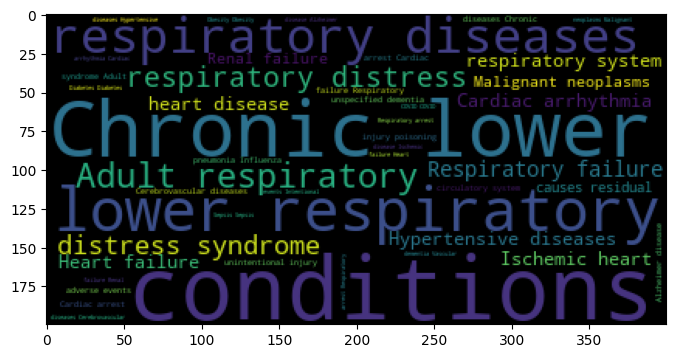

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentences = covid_deaths["Condition"].tolist()
# print(sentences)
sentences_as_a_string = ' '.join(sentences)
# print(sentences_as_a_string)


# Convert the string into WordCloud
plt.figure(figsize=(8, 8))
plt.imshow(WordCloud().generate(sentences_as_a_string))

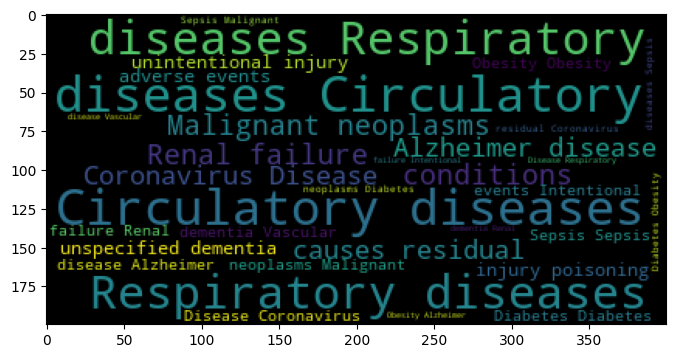

In [19]:
sentences = covid_deaths["Condition Group"].tolist()
sentences_as_a_string = ' '.join(sentences)
plt.figure(figsize=(8, 8))
plt.imshow(WordCloud().generate(sentences_as_a_string))
